In [1]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data_sets/Salary_Data.csv')

data.head()
data.shape
print("="*50)
print(data.describe())
print("="*50)
print(data.info())
print("="*50)

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes
None


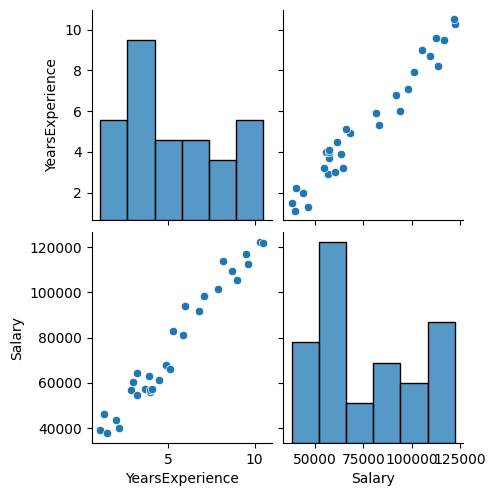

In [4]:
sns.pairplot(data)
plt.show()

In [8]:
x_avg = data['YearsExperience'].sum() /  data['YearsExperience'].count()
y_avg = data['Salary'].sum() /  data['Salary'].count()

data['x-_x'] = data['YearsExperience'] - x_avg
data['y-_y'] = data['Salary'] - y_avg

data['x-_x^2'] = data['x-_x'].pow(2)
data['y-_y^2'] = data['y-_y'].pow(2)

data['x-_x * y-_y'] = data['x-_x'] * data['y-_y']

In [10]:
data.head()

,YearsExperience,Salary,x-_x,y-_y,x-_x^2,y-_y^2,x-_x * y-_y
0,1.1,39343,-4.213333,-36660.0,17.752178,1.343956e+09,154460.800000
1,1.3,46205,-4.013333,-29798.0,16.106844,8.879208e+08,119589.306667
2,1.5,37731,-3.813333,-38272.0,14.541511,1.464746e+09,145943.893333
3,2.0,43525,-3.313333,-32478.0,10.978178,1.054820e+09,107610.440000
4,2.2,39891,-3.113333,-36112.0,9.692844,1.304077e+09,112428.693333


In [11]:
sum_xX_Mult_Yy = data['x-_x * y-_y'].sum()
sum_xX_2 = data['x-_x^2'].sum()
sum_yY_2 = data['y-_y^2'].sum()

In [12]:
r = sum_xX_Mult_Yy / math.sqrt(sum_xX_2*sum_yY_2)
sy = math.sqrt(sum_yY_2/(data['Salary'].count()-1))
sx = math.sqrt(sum_xX_2/(data['Salary'].count()-1))

slope = r*(sy/sx)
b = y_avg - slope * x_avg
print(f'slope = {slope} , b = {b}')

slope = 9449.962321455077 , b = 25792.20019866869


In [22]:
data['Predicted_Output'] = slope*data['YearsExperience']+b
data['Error_value'] = (data['Predicted_Output'] - data['Salary']).pow(2)
main_sqrt_error = (1/2*data['Salary'].count()) * data['Error_value'].sum()
print(f'main_sqrt_error = {main_sqrt_error}')

data.head()

main_sqrt_error = 14071928275.026438


,YearsExperience,Salary,x-_x,y-_y,x-_x^2,y-_y^2,x-_x * y-_y,Predicted_Output,Error_value
0,1.1,39343,-4.213333,-36660.0,17.752178,1.343956e+09,154460.800000,36187.158752,9.959334e+06
1,1.3,46205,-4.013333,-29798.0,16.106844,8.879208e+08,119589.306667,38077.151217,6.606193e+07
2,1.5,37731,-3.813333,-38272.0,14.541511,1.464746e+09,145943.893333,39967.143681,5.000339e+06
3,2.0,43525,-3.313333,-32478.0,10.978178,1.054820e+09,107610.440000,44692.124842,1.362180e+06
4,2.2,39891,-3.113333,-36112.0,9.692844,1.304077e+09,112428.693333,46582.117306,4.477105e+07


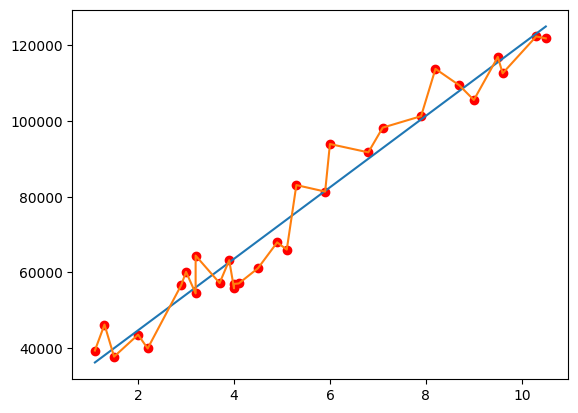

In [21]:

plt.scatter(data['YearsExperience'],data['Salary'],c='r')
plt.plot(data['YearsExperience'],data['Predicted_Output'])
plt.plot(data['YearsExperience'],data['Salary'])